In [1]:
from typing import Callable, Tuple
from finite_distributions.FiniteDistribution import FiniteDistribution
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sinkhorn.SinkhornRunner as SinkhornRunner
import sinkhorn.SinkhornKernels as skern
import visualizer.joint_distribution_visualizer as jdv
import pandas as pd

In [2]:
def gaussian_prob(mu: float, sigma: float, x: float):
    return np.exp(-(x - mu)**2 / (2 * sigma * sigma))

In [3]:
mu_1 = -0.0
sigma_1 = 1.0

mu_2 = 0.0
sigma_2 = np.sqrt(2)

In [4]:
def unregularized_transport_map(x: float) -> float:
    return mu_2 + (x - mu_1) * (sigma_2/sigma_1)

In [5]:
xs = [round(x, 5) for x in np.linspace(-5, 5, 50)]

In [6]:
s1 = np.sum([gaussian_prob(mu_1, sigma_1, x) for x in xs])
s2 = np.sum([gaussian_prob(mu_2, sigma_2, x) for x in xs])

dist_1 = FiniteDistribution({x: gaussian_prob(mu_1, sigma_1, x) / s1 for x in xs})
dist_2 = FiniteDistribution({x: gaussian_prob(mu_2, sigma_2, x) / s2 for x in xs})

In [7]:
c = lambda x, y: (x - y)**2

In [8]:
def unregularized_transport_map(x: float) -> float:
    return mu_2 + (x - mu_1) * (sigma_2/sigma_1)

In [44]:
epsilons_q > 1e-12

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [48]:
epsilons_q[0] > 1e-2

0.01

In [9]:
# p-norm
sinkhorn_runner = skern.get_quadratically_regularized_runner(c, use_parallelization=False)
# entropic
sinkhorn_runner_entropic = skern.get_entropically_regularized_runner(c)


epsilons_q = np.linspace(np.power(10.0, -3.0), np.power(10.0, 1.0), 500)
epsilons_e = [epsilon for epsilon in epsilons_q if epsilon > 1e-2]

delta = 0.01

distribution_outputs_quadratic = {}
for epsilon in reversed(epsilons_q):
    print(f"Running Quadratic, epsilon = {epsilon}")
    pi_p, f_p, g_p, iterations, outer_iterations = sinkhorn_runner.run_sinkhorn(dist_1, dist_2, epsilon, delta)
    distribution_outputs_quadratic[epsilon] = (pi_p, f_p, g_p, iterations, outer_iterations)
    print(f"Done with Quadratic, epsilon = {epsilon}. Inner iterations: {iterations}. Outer iterations: {outer_iterations}")

print("Done with quadratic.")

distribution_outputs_entropic = {}
for epsilon in reversed(epsilons_e):
    print(f"Running Entropic, epsilon = {epsilon}")
    _, _, _, _, iterations_outer_previous = distribution_outputs_quadratic[epsilon]
    pi_p, f_p, g_p, iterations, outer_iterations = sinkhorn_runner_entropic.run_sinkhorn(dist_1, dist_2, epsilon, delta)
    distribution_outputs_entropic[epsilon] = (pi_p, f_p, g_p, iterations, outer_iterations)
    print(f"Done with Entropic, epsilon = {epsilon}. Inner iterations: {iterations}. Outer iterations: {outer_iterations}")

print("Done with entropic.")

Running Quadratic, epsilon = 10.0
Done with Quadratic, epsilon = 10.0. Inner iterations: 3372. Outer iterations: 1
Running Quadratic, epsilon = 9.979961923847696
Done with Quadratic, epsilon = 9.979961923847696. Inner iterations: 3370. Outer iterations: 1
Running Quadratic, epsilon = 9.959923847695391
Done with Quadratic, epsilon = 9.959923847695391. Inner iterations: 3368. Outer iterations: 1
Running Quadratic, epsilon = 9.939885771543088
Done with Quadratic, epsilon = 9.939885771543088. Inner iterations: 3366. Outer iterations: 1
Running Quadratic, epsilon = 9.919847695390782
Done with Quadratic, epsilon = 9.919847695390782. Inner iterations: 3364. Outer iterations: 1
Running Quadratic, epsilon = 9.899809619238477
Done with Quadratic, epsilon = 9.899809619238477. Inner iterations: 3362. Outer iterations: 1
Running Quadratic, epsilon = 9.879771543086173
Done with Quadratic, epsilon = 9.879771543086173. Inner iterations: 3362. Outer iterations: 1
Running Quadratic, epsilon = 9.85973346

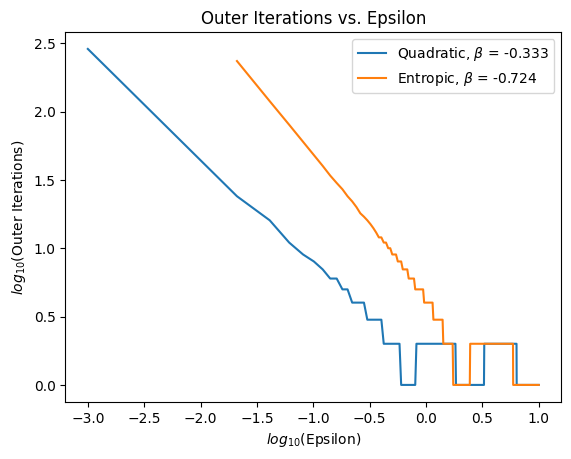

In [54]:
plt.figure()

xs_q = np.log10(epsilons_q)
xs_e = np.log10(epsilons_e)

ys_q = np.log10(np.array([distribution_outputs_quadratic[epsilon][4] for epsilon in epsilons_q]))
ys_e = np.log10(np.array([distribution_outputs_entropic[epsilon][4] for epsilon in epsilons_e]))

var_x_q = np.mean(xs_q * xs_q) - np.mean(xs_q)**2
cov_q = np.mean(ys_q * xs_q) - np.mean(ys_q)*np.mean(xs_q)

var_x_e = np.mean(xs_e*xs_e) - np.mean(xs_e)**2
cov_e = np.mean(ys_e * xs_e) - np.mean(ys_e)*np.mean(xs_e)

beta_q = cov_q / var_x_q
beta_e = cov_e / var_x_e

plt.plot(xs_q, ys_q, label = f"Quadratic, $\\beta$ = {round(beta_q, 3)}")
plt.plot(xs_e, ys_e, label = f"Entropic, $\\beta$ = {round(beta_e, 3)}")
plt.xlabel("$log_{10}$(Epsilon)")
plt.ylabel("$log_{10}$(Outer Iterations)")
plt.title("Outer Iterations vs. Epsilon")
plt.legend()
plt.savefig('./plots/log_epsilon_vs_outer_iterations.png', dpi=300)
plt.show()

In [ ]:
# # now we calculate the maxmimum width of support around each point. 
# epsilon_threshold_entropic = 1e-12 # cutoff, since entropic has full support
# deminimis = 1e-12 # floating-point rouding cutoff
# max_diams_quadratic = []
# max_diams_entropic = []

# for epsilon in epsilons_q:
#     valid_entropic = epsilon in epsilons_e
#     (pi_q, _, _, _, _) = distribution_outputs_quadratic[epsilon]
#     if valid_entropic:
#         (pi_e, _, _, _, _) = distribution_outputs_entropic[epsilon]
#     max_quadratic = 0.0
#     max_entropic = 0.0
#     for x in dist_1.get_keys():
#         maxmin_quadratic = [np.inf, -np.inf]
#         maxmin_entropic = [np.inf, -np.inf]
#         for y in dist_2.get_keys():
#             if pi_q.get_probability((x, y)) > deminimis:
#                 maxmin_quadratic = [
#                     np.min([maxmin_quadratic[0], y]),
#                     np.max([maxmin_quadratic[1], y])
#                 ]
#             if valid_entropic and pi_e.get_probability((x, y)) > epsilon_threshold_entropic:
#                 maxmin_entropic = [
#                     np.min([maxmin_entropic[0], y]),
#                     np.max([maxmin_entropic[1], y])
#                 ]
#         if maxmin_quadratic[0] < maxmin_quadratic[1]:
#             max_quadratic = np.max([max_quadratic, maxmin_quadratic[1] - maxmin_quadratic[0]])
#         if valid_entropic and maxmin_entropic[0] < maxmin_entropic[1]:
#             max_entropic = np.max([max_entropic, maxmin_entropic[1] - maxmin_entropic[0]])
#     max_diams_quadratic.append(max_quadratic)
#     if valid_entropic: 
#         max_diams_entropic.append(max_entropic)

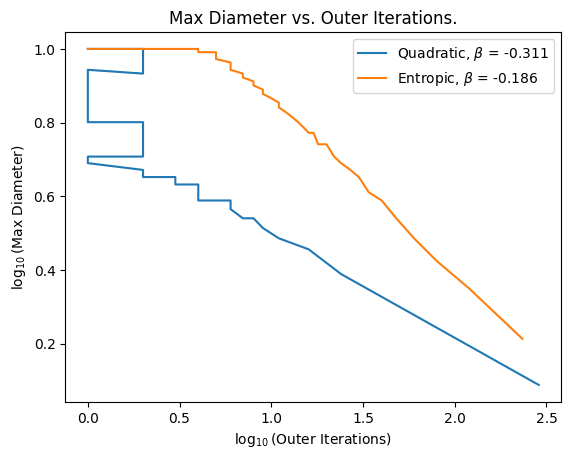

In [52]:
plt.figure()

xs_q = np.log10(np.array([distribution_outputs_quadratic[epsilon][4] for epsilon in epsilons_q]))
xs_e = np.log10(np.array([distribution_outputs_entropic[epsilon][4] for epsilon in epsilons_e]))

ys_q = np.log10(max_diams_quadratic)
ys_e = np.log10(max_diams_entropic)

var_x_q = np.mean(xs_q*xs_q) - np.mean(xs_q)**2
cov_q = np.mean(ys_q * xs_q) - np.mean(ys_q)*np.mean(xs_q)

var_x_e = np.mean(xs_e*xs_e) - np.mean(xs_e)**2
cov_e = np.mean(ys_e * xs_e) - np.mean(ys_e)*np.mean(xs_e)

beta_q = cov_q / var_x_q
beta_e = cov_e / var_x_e
plt.plot(xs_q, np.log10(max_diams_quadratic), label='Quadratic, $\\beta$ = %.3f'%beta_q)
plt.plot(xs_e, np.log10(max_diams_entropic), label='Entropic, $\\beta$ = %.3f'%beta_e)
plt.xlabel('$\\log_{10}$(Outer Iterations)')
plt.ylabel('$\\log_{10}$(Max Diameter)')
plt.title('Max Diameter vs. Outer Iterations.')
plt.legend()
plt.savefig('./plots/max_diamater_vs_outer_iterations.png', dpi=300)
plt.show()

In [15]:
np.array([distribution_outputs_quadratic[epsilon][4] for epsilon in epsilons_q])

array([287,  24,  16,  11,   9,   8,   7,   6,   6,   5,   5,   4,   4,
         4,   4,   3,   3,   3,   3,   3,   3,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   

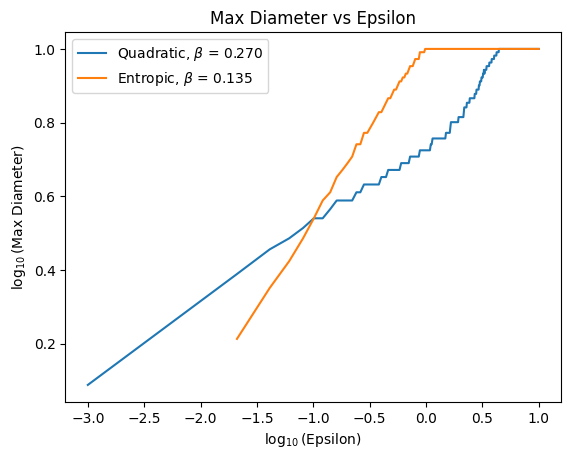

In [53]:
plt.figure()

xs_q = np.log10(epsilons_q)
xs_e = np.log10(epsilons_e)

ys_q = np.log10(max_diams_quadratic)
ys_e = np.log10(max_diams_entropic)

var_x_q = np.mean(xs_q*xs_q) - np.mean(xs_q)**2
var_x_e = np.mean(xs_e*xs_e) - np.mean(xs_e)**2

cov_q = np.mean(ys_q * xs_q) - np.mean(ys_q)*np.mean(xs_q)
cov_e = np.mean(ys_e * xs_e) - np.mean(ys_e)*np.mean(xs_e)

beta_q = cov_q / var_x_q
beta_e = cov_e / var_x_e
plt.plot(xs_q, np.log10(max_diams_quadratic), label='Quadratic, $\\beta$ = %.3f'%beta_q)
plt.plot(xs_e, np.log10(max_diams_entropic), label='Entropic, $\\beta$ = %.3f'%beta_e)
plt.xlabel('$\\log_{10}$(Epsilon)')
plt.ylabel('$\\log_{10}$(Max Diameter)')
plt.title('Max Diameter vs Epsilon')
plt.legend()
plt.savefig('./plots/epsilon_vs_max_diameter.png', dpi=300)
plt.show()

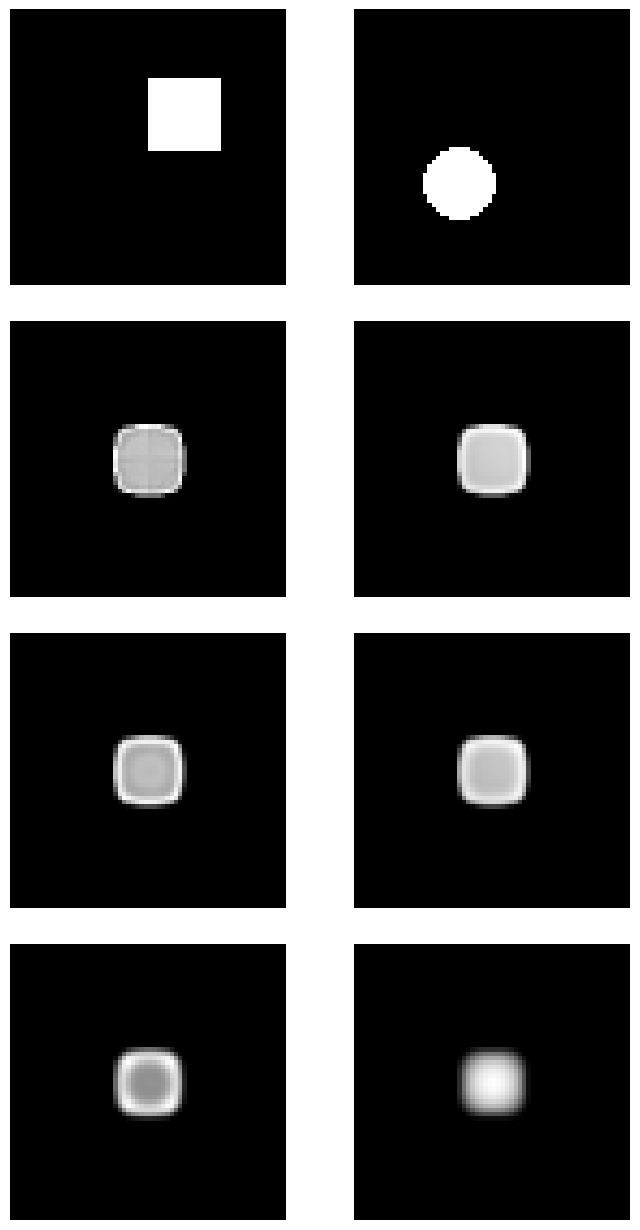

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# use_black = False

# # Suppose you have 8 .png files
# image_paths = [
#     "images/black_square_on_white.png",
#     "images/black_circle_on_white.png",
#     "images/black_composite_img_p_epsilon_0.1.png",
#     "images/black_composite_img_p_entropic_epsilon_0.5.png",
#     "images/black_composite_img_p_epsilon_0.5.png",
#     "images/black_composite_img_p_entropic_epsilon_5.0.png",
#     "images/black_composite_img_p_epsilon_10.0.png",
#     "images/black_composite_img_p_entropic_epsilon_100.0.png",
# ] if use_black else [
#     "images/white_square_on_black.png",
#     "images/white_circle_on_black.png",
#     "images/white_composite_img_p_epsilon_0.1.png",
#     "images/white_composite_img_p_entropic_epsilon_5.0.png",
#     "images/white_composite_img_p_epsilon_1.0.png",
#     "images/white_composite_img_p_entropic_epsilon_10.0.png",
#     "images/white_composite_img_p_epsilon_10.0.png",
#     "images/white_composite_img_p_entropic_epsilon_100.0.png",
# ]

# # Load all images
# images = [mpimg.imread(img_path) for img_path in image_paths]
# # images = [img[..., :3] if img.shape[-1] == 4 else img for img in images]

# fig, axes = plt.subplots(4, 2, figsize=(8, 16))  # 4 rows, 2 columns

# axes = axes.flatten()

# for idx, ax in enumerate(axes):
#     ax.imshow(images[idx], cmap = 'gray')
#     ax.set_xticks([])
#     ax.set_yticks([])
#     ax.set_frame_on(False)  # remove the frame
#     ax.axis('off')          # double ensure it's clean

# plt.subplots_adjust(wspace=0.25, hspace=0.05)  # no gaps between images
# # plt.tight_layout(pad=0.05)  # no padding

# plt.savefig(
#     "images/black_composite_for_display.png" 
#     if use_black else 
#     "images/white_composite_for_display.png" ,
#     bbox_inches='tight', pad_inches=0, dpi = 300)
# plt.show()

0.021038076152304613
0.10119038076152306
1.0029038076152306
10.0


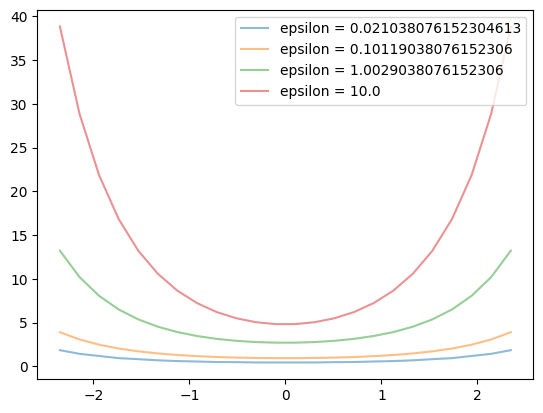

In [ ]:
import bisect
plt.figure()
epsilons_to_test = [
    epsilons_e[bisect.bisect_left(epsilons_e, eps)] for eps in [0.01, 0.1, 1.0, 10.0]
]
for epsilon in epsilons_to_test:
    print(epsilon)
    pi_e = distribution_outputs_entropic[epsilon][0]
    keys = pi_e.get_keys()
    keys_x = np.array(sorted(list(set([key[0] for key in keys]))))
    keys_x = keys_x[abs(keys_x) < 2.5]
    keys_y = np.array(sorted(list(set([key[1] for key in keys]))))
    pi_array = np.array([[pi_e.get_probability((key_x, key_y)) if (key_x, key_y) in keys else 0.0 for key_y in keys_y] for key_x in keys_x])
    y_value_array = np.array([[key_y for key_y in keys_y] for _ in keys_x])
    rowwise_variances_around_expected_no_normalization = np.sqrt((pi_array * (y_value_array - unregularized_transport_map(keys_x)[:, np.newaxis])**2).sum(axis = 1))
    normalization = pi_array.sum(axis = 1)
    rowwise_variances_around_expected = rowwise_variances_around_expected_no_normalization / normalization
    plt.plot(keys_x, rowwise_variances_around_expected, label = f'epsilon = {epsilon}', alpha = 0.5)
plt.legend(loc='upper right')
plt.show()


# plt.close()

0.001
0.021038076152304613
0.10119038076152306
1.0029038076152306
10.0


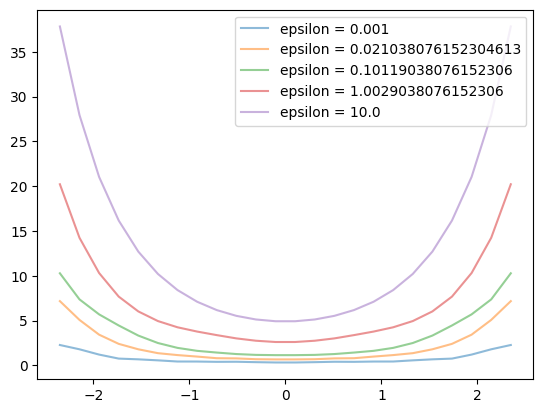

In [ ]:
import bisect
plt.figure()
epsilons_to_test = [
    epsilons_q[bisect.bisect_left(epsilons_q, eps)] for eps in [0.001, 0.01, 0.1, 1.0, 10.0]
]
for epsilon in epsilons_to_test:
    print(epsilon)
    pi_q = distribution_outputs_quadratic[epsilon][0]
    keys = pi_q.get_keys()
    keys_x = np.array(sorted(list(set([key[0] for key in keys]))))
    keys_x = keys_x[abs(keys_x) < 2.5]
    keys_y = np.array(sorted(list(set([key[1] for key in keys]))))
    pi_array = np.array([[pi_q.get_probability((key_x, key_y)) if (key_x, key_y) in keys else 0.0 for key_y in keys_y] for key_x in keys_x])
    y_value_array = np.array([[key_y for key_y in keys_y] for _ in keys_x])
    rowwise_variances_around_expected_no_normalization = np.sqrt((pi_array * (y_value_array - unregularized_transport_map(keys_x)[:, np.newaxis])**2).sum(axis = 1))
    normalization = pi_array.sum(axis = 1)
    rowwise_variances_around_expected = rowwise_variances_around_expected_no_normalization / normalization
    plt.plot(keys_x, rowwise_variances_around_expected, label = f'epsilon = {epsilon}', alpha = 0.5)
plt.legend(loc='upper right')
plt.show()


# plt.close()

In [ ]:
keys_x = np.array(sorted(list(set([key[0] for key in keys]))))
keys_y = np.array(sorted(list(set([key[1] for key in keys]))))
pi_array = np.array([[pi_q.get_probability((key_x, key_y)) if (key_x, key_y) in keys else 0.0 for key_y in keys_y] for key_x in keys_x])
rowwise_variances_around_expected = np.sqrt(((pi_array - unregularized_transport_map(keys_x)[:, np.newaxis])**2).mean(axis = 1))

In [ ]:
keys_x

array([-5.     , -4.79592, -4.59184, -4.38776, -4.18367, -3.97959,
       -3.77551, -3.57143, -3.36735, -3.16327, -2.95918, -2.7551 ,
       -2.55102, -2.34694, -2.14286, -1.93878, -1.73469, -1.53061,
       -1.32653, -1.12245, -0.91837, -0.71429, -0.5102 , -0.30612,
       -0.10204,  0.10204,  0.30612,  0.5102 ,  0.71429,  0.91837,
        1.12245,  1.32653,  1.53061,  1.73469,  1.93878,  2.14286,
        2.34694,  2.55102,  2.7551 ,  2.95918,  3.16327,  3.36735,
        3.57143,  3.77551,  3.97959,  4.18367,  4.38776,  4.59184,
        4.79592,  5.     ])

In [ ]:
keys_y

array([-5.     , -4.79592, -4.59184, -4.38776, -4.18367, -3.97959,
       -3.77551, -3.57143, -3.36735, -3.16327, -2.95918, -2.7551 ,
       -2.55102, -2.34694, -2.14286, -1.93878, -1.73469, -1.53061,
       -1.32653, -1.12245, -0.91837, -0.71429, -0.5102 , -0.30612,
       -0.10204,  0.10204,  0.30612,  0.5102 ,  0.71429,  0.91837,
        1.12245,  1.32653,  1.53061,  1.73469,  1.93878,  2.14286,
        2.34694,  2.55102,  2.7551 ,  2.95918,  3.16327,  3.36735,
        3.57143,  3.77551,  3.97959,  4.18367,  4.38776,  4.59184,
        4.79592,  5.     ])

In [ ]:

((pi_array - unregularized_transport_map(keys_x)[:, np.newaxis])**2).mean(axis = 1)

array([5.00000001e+01, 4.60016975e+01, 4.21699897e+01, 3.85048770e+01,
       3.50061924e+01, 3.16742798e+01, 2.85089655e+01, 2.55102524e+01,
       2.26781455e+01, 2.00126520e+01, 1.75136635e+01, 1.51814372e+01,
       1.30158599e+01, 1.10169430e+01, 9.18469155e+00, 7.51909924e+00,
       6.02007366e+00, 4.68771948e+00, 3.52189934e+00, 2.52254325e+00,
       1.68958395e+00, 1.02297303e+00, 5.22675599e-01, 1.88769430e-01,
       2.12974028e-02, 2.03623660e-02, 1.86078750e-01, 5.18549540e-01,
       1.01787499e+00, 1.68403522e+00, 2.51703640e+00, 3.51683030e+00,
       4.68334972e+00, 6.01652461e+00, 7.51637265e+00, 9.18270452e+00,
       1.10155666e+01, 1.30149523e+01, 1.51808668e+01, 1.75133216e+01,
       2.00124563e+01, 2.26780385e+01, 2.55101965e+01, 2.85089376e+01,
       3.16742665e+01, 3.50061863e+01, 3.85048743e+01, 4.21699886e+01,
       4.60016971e+01, 4.99999999e+01])

In [ ]:
unregularized_transport_map(keys_x)[:, np.newaxis]

array([[-7.07106781],
       [-6.78245511],
       [-6.4938424 ],
       [-6.2052297 ],
       [-5.91660285],
       [-5.62799015],
       [-5.33937745],
       [-5.05076474],
       [-4.76215204],
       [-4.47353934],
       [-4.18491249],
       [-3.89629979],
       [-3.60768708],
       [-3.31907438],
       [-3.03046167],
       [-2.74184897],
       [-2.45322212],
       [-2.16460942],
       [-1.87599672],
       [-1.58738401],
       [-1.29877131],
       [-1.01015861],
       [-0.72153176],
       [-0.43291906],
       [-0.14430635],
       [ 0.14430635],
       [ 0.43291906],
       [ 0.72153176],
       [ 1.01015861],
       [ 1.29877131],
       [ 1.58738401],
       [ 1.87599672],
       [ 2.16460942],
       [ 2.45322212],
       [ 2.74184897],
       [ 3.03046167],
       [ 3.31907438],
       [ 3.60768708],
       [ 3.89629979],
       [ 4.18491249],
       [ 4.47353934],
       [ 4.76215204],
       [ 5.05076474],
       [ 5.33937745],
       [ 5.62799015],
       [ 5